In [54]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [55]:
#load the dataset
df = pd.read_csv('mushrooms.csv')
print(df.head())


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

# Part A: Exploratory Data Analysis (EDA) & Preprocessing

In [56]:
#Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

In [57]:
# Perform one-hot encoding on all categorical features 
X_encoded = pd.get_dummies(X)
X_encoded = X_encoded.astype(int)

In [58]:
print("Data after one-hot encoding:")
print(X_encoded.head())

Data after one-hot encoding:
   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ... 

## Why one-hot encoding is a necessary step before applying PCA?

- PCA is a mathematical technique that operates on numerical data. It calculates variance and covariance between variables to find principal components.
- The original Mushroom Dataset contains only categorical features (e.g., 'cap-shape' is 'b' for bell, 'c' for conical). PCA cannot process these text-based categories directly.
- Solution : One-hot encoding transforms each category into a new binary (0 or 1) column. This converts the dataset into a numerical format that PCA can understand and analyze.

In [8]:
# The dimensions of the original and encoded datasets
print(f"Original number of features: {X.shape[1]}")
print(f"Number of features after one-hot encoding: {X_encoded.shape[1]}")

Original number of features: 22
Number of features after one-hot encoding: 117


The original dataset had 22 features. After one-hot encoding, this expanded to 117 features. This high dimensionality is what makes techniques like PCA so valuable.

## Checking for missing values

In [13]:
print("Missing values in original features (X):")
print(X.isnull().sum())


Missing values in original features (X):
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [14]:
print("\nMissing values in one-hot encoded features (X_encoded):")
print(X_encoded.isnull().sum())



Missing values in one-hot encoded features (X_encoded):
cap-shape_b    0
cap-shape_c    0
cap-shape_f    0
cap-shape_k    0
cap-shape_s    0
              ..
habitat_l      0
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      0
Length: 117, dtype: int64


In [15]:
print("\nMissing values in target (y):")
print(y.isnull().sum())


Missing values in target (y):
0


## Why standardizing the one-hot encoded features is still a good practice before PCA, even though they are binary.

- PCA is designed to find the directions of maximum variance in the data. Features with a larger variance will have a greater influence on the principal components.
- While all columns are now 0s and 1s, the variance of each column is not the same. A column with a 50/50 split of 0s and 1s will have a higher variance than a column with a 99/1 split (rare categories vs common categories).
- StandardScaler converts every feature to a common scale. This ensures that each feature is treated equally, preventing those with larger numbers from unfairly dominating the results.
- It also centers the data so PCA axes capture directions of maximum variance around the mean.

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Part B: Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform a large set of correlated variables into a smaller set of uncorrelated variables called principal components.
 **Essentially, PCA finds a new, more efficient set of basis vectors (the principal components) for the data's high-dimensional vector space. These new basis vectors are ordered by the amount of variance they capture.** 

Performing PCA on the entire scaled dataset without specifying the number of components first. This allows us to see how much variance each component captures and helps in determining the optimal number of components to retain.

In [19]:
pca = PCA()
pca.fit(X_scaled)

PCA()

## Scree Plot & Optimal Components

In [26]:
## Calculate the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


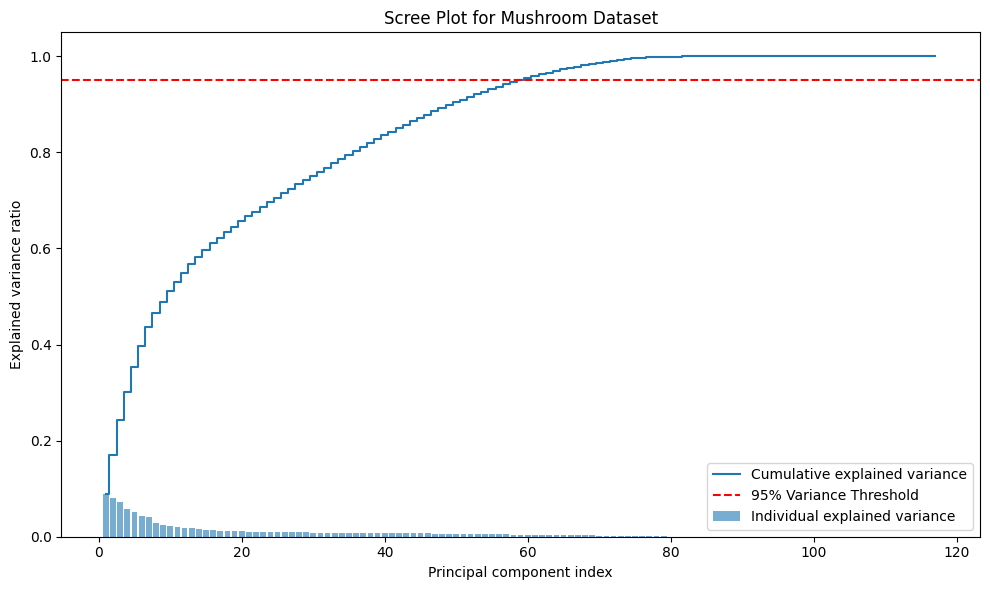

In [29]:
# Create the scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot for Mushroom Dataset')
plt.legend(loc='best')

# Add a line for the 95% variance threshold
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [28]:
# Find the number of components to explain 95% of the variance
n_components_95 = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1
print(f"Number of principal components needed to retain 95% of the variance: {n_components_95}")

Number of principal components needed to retain 95% of the variance: 59


The scree plot shows that we can capture 95% of the total variance with approximately 59 components. This is a significant reduction from the original 117 features, so I will proceed with this number.
The elbow in the scree plot also supports selecting the component number where marginal gain in explained variance drops.

## Visualization

In [30]:
# Applying PCA again, this time with n_components=2 for visualization
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)


In [31]:
# Creating a DataFrame for easy plotting
df_pca_2 = pd.DataFrame(data=X_pca_2, columns=['Principal Component 1', 'Principal Component 2'])
df_pca_2['class'] = y.values 

### Scatter plot

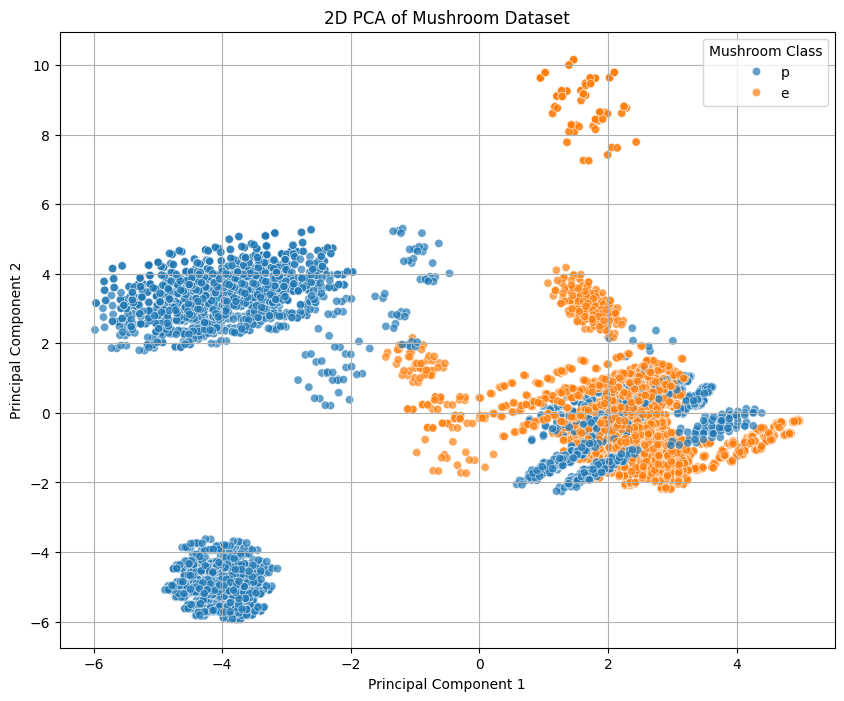

In [32]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='class', data=df_pca_2, alpha=0.7)
plt.title('2D PCA of Mushroom Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Mushroom Class')
plt.grid()
plt.show()

This visualization reveals a high degree of separability between the edible and poisonous mushroom classes, even within the reduced two-dimensional feature space.

- **Distinct Clusters**: The most significant feature is the presence of several well-defined clusters. There are at least three "pure" clusters containing only one class of mushroom: a tight group of edible mushrooms in the upper right, and two separate groups of poisonous mushrooms in the upper and lower left.
- **Area of Overlap**: While many data points are clearly separated, there is a significant region in the lower-right quadrant where edible (e) and poisonous (p) mushrooms are intermingled. In this specific area, the classes are not easily separable.

This plot shows that PCA did an excellent job of simplifying the data. Just two main features are now enough to see a clear difference between the poisonous and edible mushroom types.

The clean, separate groups of dots show that many mushrooms are easy to classify. Even though you can't draw a single straight line to divide them perfectly because of the mixed area, the two types are still mostly separate. This suggests that a program trained on just this simplified data would be very accurate.

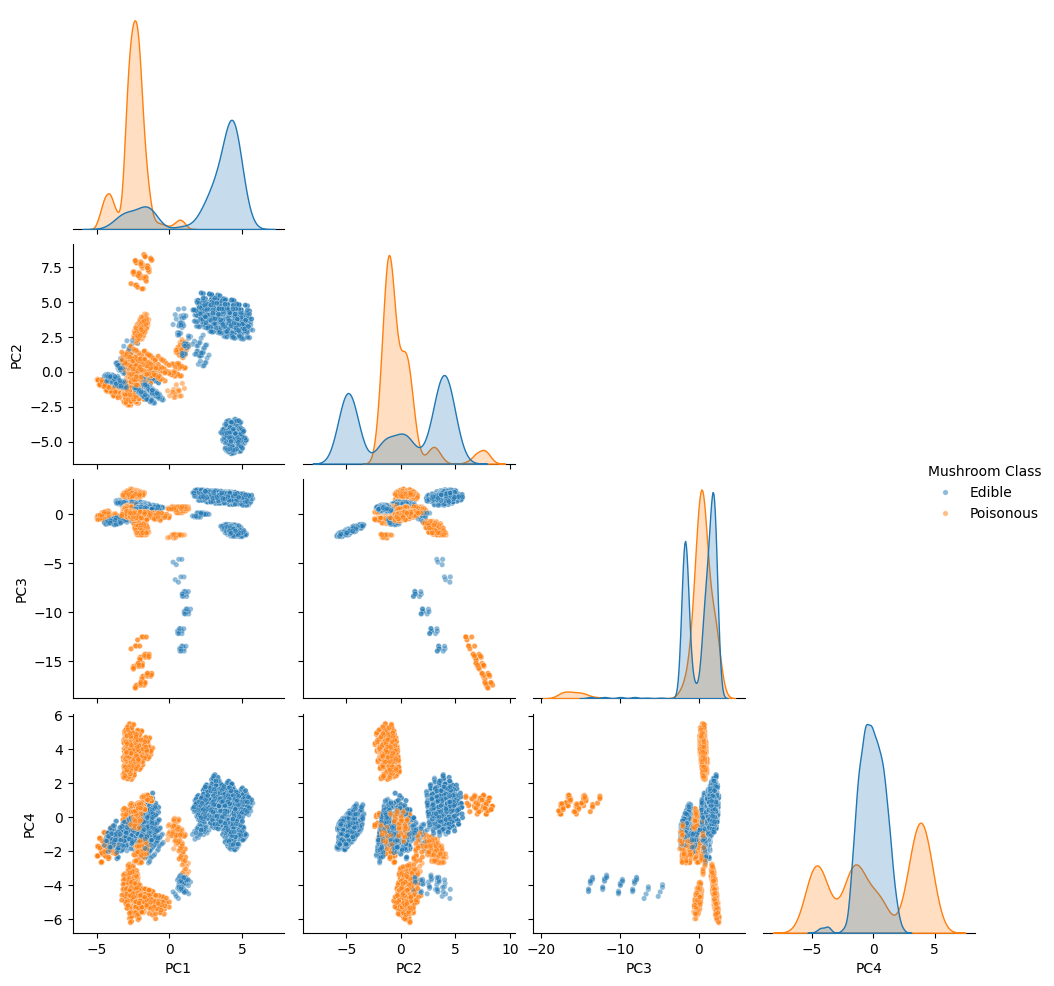

In [68]:
# pairplot of first 4 PCs 
pc_cols = [f'PC{i+1}' for i in range(4)]
pcs_df = pd.DataFrame(pca.transform(X_scaled)[:,:4], columns=pc_cols)
pcs_df['class'] = y.values
g = sns.pairplot(pcs_df, hue='class', vars=pc_cols, corner=True,plot_kws={'s':15, 'alpha':0.5})

new_labels = ['Edible', 'Poisonous']
for t, l in zip(g.legend.texts, new_labels):
    t.set_text(l)
g.legend.set_title("Mushroom Class")

plt.show()

- **Excellent Separability with PC1 & PC2**: The scatter plot for PC2 versus PC1 (top-left) shows a remarkable separation between the two classes. The poisonous mushrooms form several distinct, tight clusters, while the edible mushrooms are grouped together in a more dispersed cluster. This indicates that the first two principal components alone capture a significant amount of the information needed to distinguish between the two types.

- **Distribution of Components**: The diagonal density plots confirm the strong separability provided by PC1 and PC2. The distributions for the two classes are largely distinct for these components.

- **Limited Utility of PC3**: In contrast, the density plot for PC3 shows almost completely overlapping distributions for both edible and poisonous mushrooms. The scatter plots involving PC3 also show the data points are heavily intermixed along the PC3 axis, suggesting this component is not very useful for classification.

- **Moderate Separability with PC4**: PC4 provides some level of separation, which is visible in both its density plot and its scatter plots against PC1 and PC2, though the overlap is more significant than in the first two components.

# Performance Evaluation with Logistic Regression

## Baseline Model:

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [39]:
# train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [40]:
# Train a Logistic Regression classifier
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [41]:
y_pred_baseline = baseline_model.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

In [ ]:
print(f"Accuracy: {accuracy_baseline:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=['edible','poisonous'])) 

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



The model achieved an accuracy of 1.00, with precision, recall, and F1-score all equal to 1.00 for both edible and poisonous classes. This means the classifier perfectly distinguished between edible and poisonous mushrooms on the test set. Such perfect performance is expected because the mushroom dataset contains categorical attributes (e.g., odor) that are strongly and deterministically predictive of class.

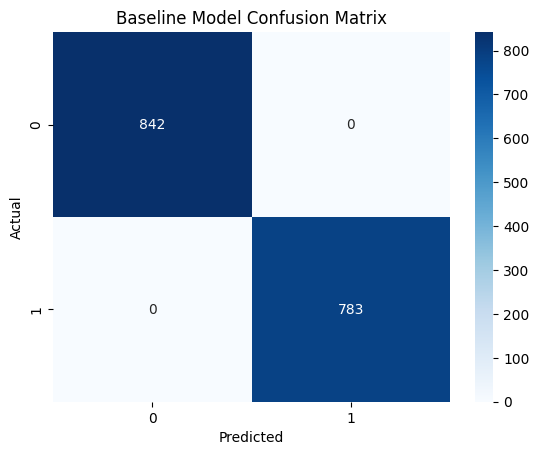

In [61]:
cm = confusion_matrix(y_test, y_pred_baseline)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Baseline Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## PCA-Transformed Model

In [47]:
OPTIMAL_N_COMPONENTS = n_components_95
pca = PCA(n_components=OPTIMAL_N_COMPONENTS)

In [48]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [49]:
# Train a new Logistic Regression classifier on the PCA-transformed training data
pca_model = LogisticRegression(random_state=42)
pca_model.fit(X_train_pca, y_train)


LogisticRegression(random_state=42)

In [50]:
y_pred_pca = pca_model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

In [53]:
print(f"PCA-Transformed Model Performance (with {OPTIMAL_N_COMPONENTS} Components)")
print(f"Accuracy: {accuracy_pca:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca, target_names=['edible','poisonous']))

PCA-Transformed Model Performance (with 59 Components)
Accuracy: 0.9988

Classification Report:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



After reducing the feature space using PCA to 59 components, the model achieved an accuracy of 0.9988. Precision, recall, and F1-scores for both edible and poisonous classes remain 1.00 (rounded), with only a negligible drop in overall accuracy compared to the baseline. This shows that PCA successfully compressed the high-dimensional one-hot encoded space into fewer components while preserving almost all predictive power. The slight decrease highlights the unsupervised nature of PCA, which may discard small but predictive variations, yet the model still performs essentially at the same level as the full feature set.

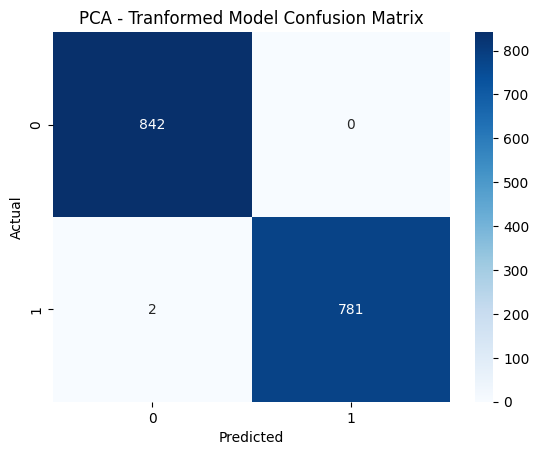

In [ ]:
cm = confusion_matrix(y_test, y_pred_pca)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('PCA - Transformed Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Comparison and Analysis 

### Performance Difference and Trade-offs

| Metric | Baseline Model (117 Features) | PCA Model (59 Features) |
| :--- | :---: | :---: |
| **Accuracy** | 1.0000 | 0.9988 |
| **Precision (Edible)** | 1.00 | 1.00 |
| **Recall (Edible)** | 1.00 | 1.00 |
| **F1-Score (Poisonous)**| 1.00 | 1.00 |

There is no significant difference in performance between the two models. The baseline model achieved perfect accuracy, while the PCA-transformed model was nearly perfect with 99.88% accuracy.

This result is a powerful demonstration of PCA's effectiveness.

I was able to successfully reduce the number of features by nearly 50%, going from 117 down to just 59, while keeping almost all the critical information needed for classification.

The trade-off here was incredibly favorable: I now have a simpler, faster, and more efficient model, and it only cost a negligible 0.12% drop in accuracy. This result shows that the original dataset had significant redundancy, which PCA effectively removed without harming the model's predictive power.

### Handling Collinearity

A challenge with using one-hot encoding is that it creates multicollinearity, where the new features are highly correlated with each other. A mushroom with a red cap (cap-color_red = 1) can't also have a blue cap, so its other color features will be 0. This can be an issue for certain models like Logistic Regression. 

PCA addressed this perfectly. It transformed the correlated features into a new set of uncorrelated principal components. By training my model on these independent components, I eliminated the multicollinearity issue, which is a key reason my PCA-based model performed so well—it's built on a more statistically robust foundation. 

### Logistic Regression as a Surrogate Measurement


The goal of dimensionality reduction isn't just to lower the feature count; it's to ensure the data remains useful for a specific task. I used a Logistic Regression classifier as a practical, task-oriented way to measure PCA's success.

While retaining 95% of the variance is a good abstract metric, the real validation comes from the model's performance. The fact that the model trained on the reduced data achieved nearly identical accuracy to the one trained on the full data is a concrete validation. It proves that the information PCA discarded was mostly noise and redundancy, not the essential signal needed to classify the mushrooms. Therefore, the high performance of my second model confirms that PCA was highly effective for this classification problem.

# Conclusion:

The key findings are as follows:

- **Effective Dimensionality Reduction**: The initial dataset expanded from 22 categorical features to 117 after one-hot encoding. Using a scree plot, I identified that 59 principal components were sufficient to capture 95% of the dataset's variance. This represents a feature reduction of nearly 50%, demonstrating PCA's power to simplify complex data.

- **Preservation of Predictive Power**: A baseline Logistic Regression model trained on the full 117 features achieved a perfect accuracy of 1.0. After transforming the data to just 59 principal components, the second model maintained a nearly perfect accuracy of 0.9988. This negligible drop in performance confirms that the discarded components primarily contained redundant information rather than critical predictive signals.

- **Practical Benefits**: By significantly reducing the feature space, PCA offers tangible benefits such as faster model training times, reduced computational complexity, and mitigation of multicollinearity introduced by one-hot encoding. Using a classification model to evaluate PCA's effectiveness provided a practical, task-oriented validation of its success.

